# 2022 NZMSA Data Science Submission.

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [3]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [4]:
#numerical stats
mean1 = dataset['tmpc'].mean()
print ('Mean temperature: ' + str(mean1) + " degrees Celsius.")

std1 = dataset['tmpc'].std()
print ('Standard deviation of temperature: ' + str(std1)) 

quant90 = dataset.tmpc.quantile(0.9)
print ('Temperature in the 90th percentile: ' + str(quant90) + " degrees Celcius.")

quant10 = dataset.tmpc.quantile(0.1)
print ("Temperature in the 10th percentile: " + str(quant10) + " degrees Celcius.")

Mean temperature: 15.81150292251008 degrees Celsius.
Standard deviation of temperature: 4.235196864334494
Temperature in the 90th percentile: 21.0 degrees Celcius.
Temperature in the 10th percentile: 11.0 degrees Celcius.


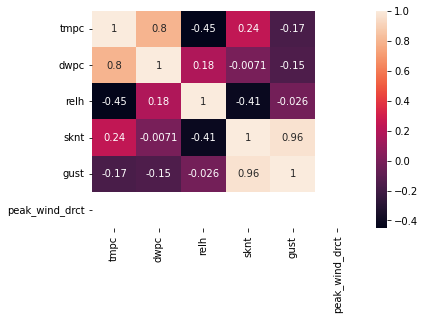

In [21]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Average Year Temperature Graphed Over Time

   year   avg_temp
0  2015  15.490395
1  2016  16.065568
2  2017  15.807846
3  2018  15.874957
4  2019  15.850617
5  2020  15.776539


<AxesSubplot:xlabel='year', ylabel='avg_temp'>

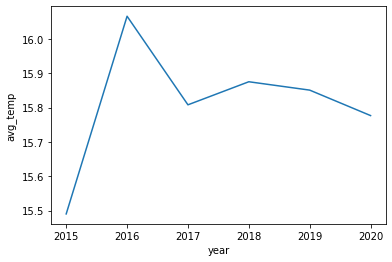

In [15]:
# convert valid to datetime format
dataset['valid'] = pd.to_datetime(dataset.valid)

# group dataset by year, then calculate avg temp for the year
yearly_avg = dataset.groupby(dataset.valid.dt.year)['tmpc'].mean().reset_index(name='tmp')

# rename columns
yearly_avg.columns = ["year", "avg_temp"]

print(yearly_avg)

# plot avg yearly temp over time
sns.lineplot(x = 'year', y = 'avg_temp',data = yearly_avg)




# Data Processing

In [ ]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

# Data Modelling

In [ ]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.